In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
#reading csv file into data frame df
df=pd.read_csv(r"C:\Users\admin\Downloads\Iot_temp_data (1).csv")
df

,DateTime,humidity,temp
0,2018-01-01 00:00:00,51.000000,22.700000
1,2018-01-01 00:01:00,76.000000,19.700001
2,2018-01-01 00:02:00,50.900000,22.600000
3,2018-01-01 00:03:00,76.800003,27.000000
4,2018-01-01 00:04:00,50.900000,22.600000
...,...,...,...
362876,2018-09-09 23:56:00,50.400000,22.600000
362877,2018-09-09 23:57:00,78.000000,19.500000
362878,2018-09-09 23:58:00,50.400000,22.600000
362879,2018-09-09 23:59:00,55.599998,28.600000


In [3]:
# first 5 records 
df.head()

,DateTime,humidity,temp
0,2018-01-01 00:00:00,51.000000,22.700000
1,2018-01-01 00:01:00,76.000000,19.700001
2,2018-01-01 00:02:00,50.900000,22.600000
3,2018-01-01 00:03:00,76.800003,27.000000
4,2018-01-01 00:04:00,50.900000,22.600000


In [4]:
#list of columns
df.columns

Index(['DateTime', 'humidity', 'temp'], dtype='object')

In [27]:
#view basic statistical details
df.describe()

,humidity,temp
count,362881.000000,362881.000000
mean,60.444541,22.410774
std,11.424798,2.635851
min,1.600000,0.000000
25%,51.000000,19.900000
50%,54.599998,22.300000
75%,74.199997,23.600000
max,99.900002,30.600000


In [8]:
df['DateTime']

0         2018-01-01 00:00:00
1         2018-01-01 00:01:00
2         2018-01-01 00:02:00
3         2018-01-01 00:03:00
4         2018-01-01 00:04:00
                 ...         
362876    2018-09-09 23:56:00
362877    2018-09-09 23:57:00
362878    2018-09-09 23:58:00
362879    2018-09-09 23:59:00
362880    2018-09-10 00:00:00
Name: DateTime, Length: 362881, dtype: object

In [28]:
#method prints inf about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362881 entries, 0 to 362880
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DateTime  362881 non-null  object 
 1   humidity  362881 non-null  float64
 2   temp      362881 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.3+ MB


In [9]:
#type of DateTime col
type(df['DateTime'])

pandas.core.series.Series

In [29]:
df.shape

(362881, 3)

In [10]:
#max tem 
df['temp'].max()

30.60000038146973

In [30]:
#to know about missing values
df.isnull().sum()

DateTime    0
humidity    0
temp        0
dtype: int64

In [12]:
#list of columns where temp is > 25
df[df['temp']>25]

,DateTime,humidity,temp
3,2018-01-01 00:03:00,76.800003,27.0
5,2018-01-01 00:05:00,77.900002,27.0
8,2018-01-01 00:08:00,77.900002,27.0
11,2018-01-01 00:11:00,78.000000,27.0
13,2018-01-01 00:13:00,78.000000,27.0
...,...,...,...
362864,2018-09-09 23:44:00,55.599998,28.6
362867,2018-09-09 23:47:00,55.599998,28.6
362870,2018-09-09 23:50:00,55.599998,28.6
362875,2018-09-09 23:55:00,55.599998,28.6


In [31]:
#to find and print about any duplicate records
duplicate_df=df.duplicated()
print(duplicate_df.sum())
df[duplicate_df]

0


,DateTime,humidity,temp


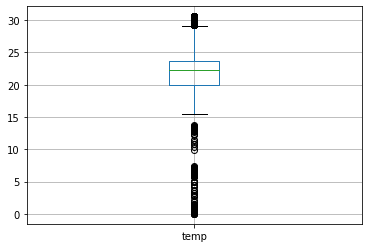

In [32]:
#plotting boxplot to find about outliers
df.boxplot(column=["temp"])

In [23]:
#defining function to find any outliers and to get lower and upper tem range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
    

In [24]:
remove_outlier(df['temp'])

(14.3499990463257, 29.150000572204583)

In [ ]:
#can't plot the plots
df.plot(kind='bar',figsize=(10,5))
plt.title("date time and temperature")
plt.ylabel('temp')
plt.xlabel('date time')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
c=df.temp()
sns.heatmap(c,Datetime)

In [ ]:
df.plot(x="DateTime", y=["temp"], kind="bar")

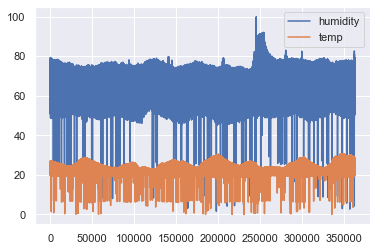

In [5]:
df.plot.line()

In [ ]:
df.plot.scatter('DateTime','temp')

In [ ]:
df.plot.hexbin()